In [3]:
### Run this cell before continuing. 
library(tidyverse)
library(repr)
library(readxl)
options(repr.matrix.max.rows = 6)
library(ggplot2)
library(tidymodels)

**Title**
<br>
Predicting Heart Disease using Health-related Factors


**Introduction**


* Background:

Heart disease is a major global health concern, and it's responsible for a significant number of lives lost. Detecting it early is  important for effective prevention and treatment. Our project will focus on creating a tool that determines whether an individual will develop heart disease by considering a range of health-related factors.

* Questions we'll answer:
  
Is it possible to develop a predictive model leveraging attributes in the Heart Disease dataset to forecast the likelihood of an individual having heart disease? Furthermore, what are the predominant factors that exhibit significant influence on the likelihood of an individual developing heart disease based on the available dataset?

* Dataset we'll be using:

https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset/


* Features Included:
    - age
    - sex
    - chest pain type: 0, 1, 2, 3
    - resting blood pressure
    - serum cholestoral in mg/dl
    - resting electrocardiographic results - values 0, 1, 2
    - maximum heart rate achieved
    - exercise induced angina
    - oldpeak = ST depression induced by exrcise relative to rest
    - the slope of the peak exercise ST segment
    - number of major vessels (0, 1, 2, 3) colored by flourosopy thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
 Note: The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.ble defect
ble defect


**Preliminary Exploratory Data Analysis**

* Reading dataset:

In [4]:
heart_data <- read_csv("https://raw.githubusercontent.com/JackieHam/DSCI-100-project/main/data/heart.csv")
heart_data

ERROR: Error in open.connection(structure(5L, class = c("curl", "connection"), conn_id = <pointer: 0x3a4>), : HTTP error 404.


* Cleaning and Wrangling:

We first change the column names to more understandable terms:

In [3]:
new_column_names <- c("age", "sex", "chest_pain_type", "resting_blood_pressure", "serum_cholesterol", "fasting_blood_pressure>120mg/dl", "resting_electrocardiographic", "max_heart_rate", "exercies_induced_angina", "oldpeak", "slope_of_peak_exercise_ST", "major_vessels_num", "thal", "heart_disease")
colnames(heart_data) <- new_column_names
heart_data

age,sex,chest_pain_type,resting_blood_pressure,serum_cholesterol,fasting_blood_pressure>120mg/dl,resting_electrocardiographic,max_heart_rate,exercies_induced_angina,oldpeak,slope_of_peak_exercise_ST,major_vessels_num,thal,heart_disease
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


The column names are now more intuitive for people who are unfamiliar with the dataset.

* Splitting of dataset

We split our dataset into training and testing data, with training data taking up 75% of the total data available:

In [4]:
hd_split <- initial_split(heart_data, prop = 0.75, strata = heart_disease)
hd_training <- training(hd_split)
hd_testing <- testing(hd_split)

hd_training <- hd_training |>
        mutate(heart_disease = as_factor(heart_disease))

The 75% trainig data proportion helps ensure that we have sufficient training data to build an accurate predictive model. 

At the same time, we have 25% of the testing data which enables us to evaluate the performance of our model based on test score. If test score turns out to be poor, we will make necessary adjustments at the training stage to improve performance of our model as much as possible.

* Number of features

Since we are planning to use KNN classifier to build our model, we should not have too many features.

This is because increasing the number of features will increase the dimension of the problem. Since KNN classifier makes prediction based on Euclidian distance, it will perform pooly in high dimensions.

Therefore, we will only choose 2 - 3 features to build our model and eventually make predictions about whether the patient is likely to have heart disease on unseen data.

* Feature Selection

* Mean of features we use and count of cases for each category in target:

In [5]:
avg <- hd_training |>
  group_by(heart_disease) |>
  summarise(avg_resting_bps = mean(resting_blood_pressure),avg_max_heart_rate = mean(max_heart_rate), count = n())
avg

heart_disease,avg_resting_bps,avg_max_heart_rate,count
<fct>,<dbl>,<dbl>,<int>
0,133.6765,139.5241,374
1,129.4721,158.5685,394


* Graphic Visualization

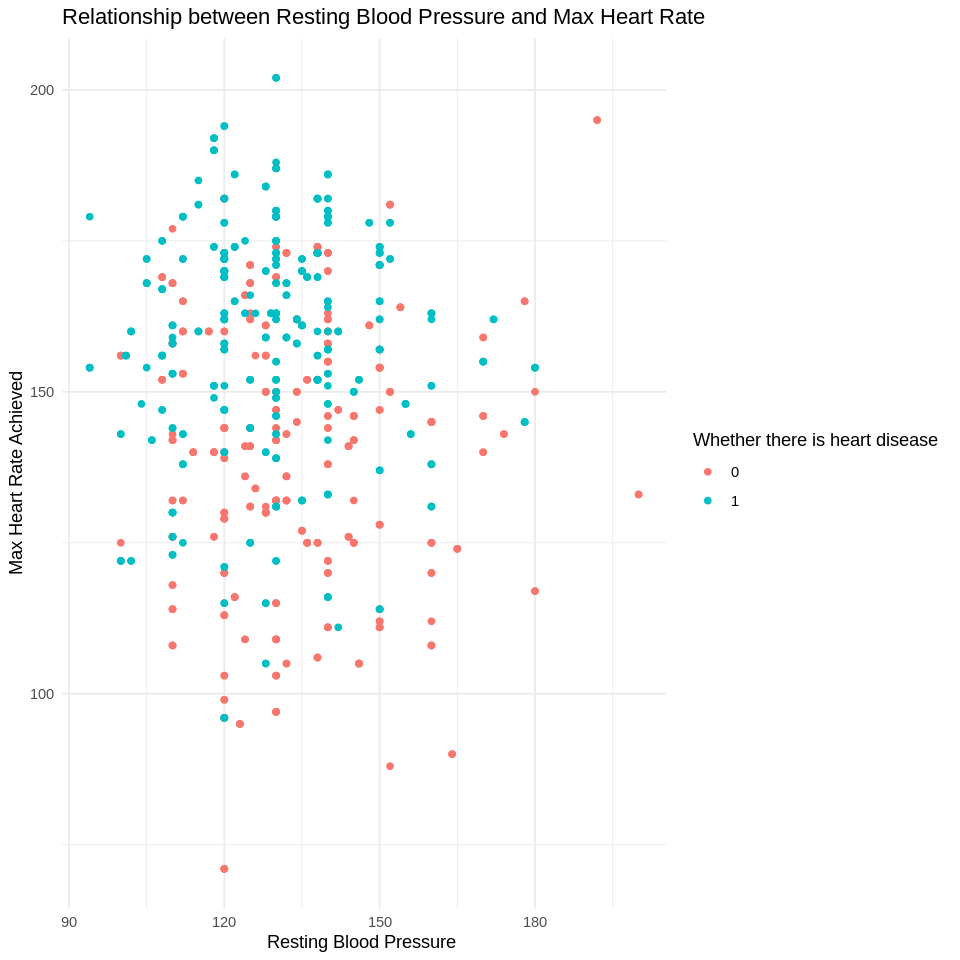

In [6]:
options(repr.plot.width = 8, repr.plot.height = 8)

hd_plot <- ggplot(hd_training, aes(x=resting_blood_pressure, y=serum_cholesterol, colour=heart_disease)) + 
  geom_point() +
  labs(title="Relationship between Resting Blood Pressure and Max Heart Rate",
       x="Resting Blood Pressure ",
       y="Max Heart Rate Achieved",
      colour="Whether there is heart disease") +
  theme_minimal()

hd_plot

**Methods**

* Variables we'll use:
    - resting blood pressure
    - maximum heart rate achieved
    - (target: heart_disease)

In [7]:
heart_data_final <- heart_data |>
                    select(heart_disease, resting_blood_pressure, max_heart_rate)
heart_data_final

heart_disease,resting_blood_pressure,max_heart_rate
<dbl>,<dbl>,<dbl>
0,125,168
0,140,155
0,145,125
⋮,⋮,⋮
0,110,118
1,110,159
0,120,113


* Visualizing results:
    - Presenting it in a scatter plot, which will allow us to observe trends and patterns in how heart disease risk changes with the chosen attribute
    - Using KNN to predict whethere there will be heart disease in unseen data based on their variable values

**Expected Outcomes and Significance**

* Expected findings
    - devising health-related attributes and how they affect whether someone will develop heart disease

* Impact of findings
    - come up with a predictive model
    - conclude the most important risk factors
    - help individuals detect if there is a potential of having heart disease
    - help them get the right treatment in early stages

* Future questions
    - further research into the development of heart-disease risk assessment tools focusing on the most important risk factors
    - how we could make it into a more accessible and user-friendly interface for every individual.
